### Getting MNIST data

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Splitting train dataset into a train and validation sets

In [8]:
new_train_images = train_images[:50000, :, :]
new_train_images.shape

(50000, 28, 28)

In [9]:
validation_images = train_images[50000:, :, :]
validation_images.shape

(10000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
new_train_labels = train_labels[:50000]
new_train_labels.shape

(50000,)

In [12]:
validation_labels = train_labels[50000:]
validation_labels.shape

(10000,)

In [13]:
test_labels.shape

(10000,)

### Reshaping for Dense input 

In [14]:
train_images_flat = new_train_images.reshape((50000, 28 * 28))
train_images_flat = train_images_flat.astype('float32') / 255

validation_images_flat = validation_images.reshape((10000, 28 * 28))
validation_images_flat = validation_images_flat.astype('float32') / 255

test_images_flat = test_images.reshape((10000, 28 * 28))
test_images_flat = test_images_flat.astype('float32') / 255

print(train_images_flat.shape)
print(validation_images_flat.shape)
print(test_images_flat.shape)

(50000, 784)
(10000, 784)
(10000, 784)


### One-hot / categorical encoding of labels

In [15]:
from keras.utils import to_categorical

train_labels_one_hot = to_categorical(new_train_labels)
validation_labels_one_hot = to_categorical(validation_labels)
test_labels_one_hot = to_categorical(test_labels)
print("train_labels_one_hot.shape: ", train_labels_one_hot.shape)
print("validation_labels_one_hot.shape: ", validation_labels_one_hot.shape)
print("test_lanels_one_hot: ", test_labels_one_hot.shape)

('train_labels_one_hot.shape: ', (50000, 10))
('validation_labels_one_hot.shape: ', (10000, 10))
('test_lanels_one_hot: ', (10000, 10))


In [17]:
from keras.models import Model
from keras.layers import Input, Dense

inputs = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(hidden1)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images_flat,
                    train_labels_one_hot,
                    epochs=5,
                    batch_size=128,
                    validation_data=(validation_images_flat, validation_labels_one_hot))

history_dict = history.history

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s - loss: 0.2845 - acc: 0.9178 - val_loss: 0.1394 - val_acc: 0.9589
Epoch 2/5
50000/50000 [==============================] - 2s - loss: 0.1173 - acc: 0.9643 - val_loss: 0.1052 - val_acc: 0.9693
Epoch 3/5
50000/50000 [==============================] - 2s - loss: 0.0771 - acc: 0.9767 - val_loss: 0.0879 - val_acc: 0.9747
Epoch 4/5
50000/50000 [==============================] - 2s - loss: 0.0561 - acc: 0.9834 - val_loss: 0.0866 - val_acc: 0.9740
Epoch 5/5
50000/50000 [==============================] - 2s - loss: 0.0405 - acc: 0.9880 - val_loss: 0.0903 - val_acc: 0.9758


In [20]:
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
epochs

[1, 2, 3, 4, 5]

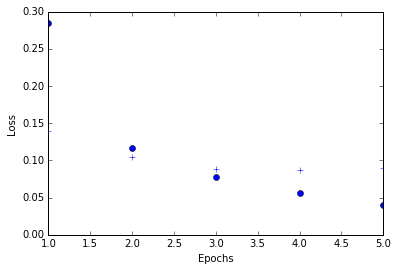

In [28]:
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()